In [203]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 10

In [204]:
# contient les données de conso par heure et créé par node-red
# chaque entrée est la conso estimée qui est calculée pour 1 heure en kWh suivant la conso instantanée
# la moyenne de l'ensemble donne une idée de la conso théorique qui n'est pas réelle
# car la vrai consommation est le nombre d'entrées qui chacune représente 1 watt réellement consommé.

df = pd.read_csv(r"C:\Users\jean\Documents\interval&conso.csv", names=["interval","conso_h"])
df

,interval,conso_h
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
26941,14458,0.25
26942,14454,0.25
26943,14476,0.25
26944,14534,0.25


In [205]:
df['cumul(ms)']=df['interval'].cumsum()
df

,interval,conso_h,cumul(ms)
0,26289,0.14,26289
1,26243,0.14,52532
2,25885,0.14,78417
3,25754,0.14,104171
4,25774,0.14,129945
...,...,...,...
26941,14458,0.25,632528881
26942,14454,0.25,632543335
26943,14476,0.25,632557811
26944,14534,0.25,632572345


In [206]:
w1000 = df.tail(1000)
w1000

,interval,conso_h,cumul(ms)
25946,25759,0.14,610460920
25947,25809,0.14,610486729
25948,25695,0.14,610512424
25949,24986,0.14,610537410
25950,25081,0.14,610562491
...,...,...,...
26941,14458,0.25,632528881
26942,14454,0.25,632543335
26943,14476,0.25,632557811
26944,14534,0.25,632572345


In [207]:
# fenetre 1 kW consommé
w1000['cumul(ms)']=w1000['interval'].cumsum()
w1000

,interval,conso_h,cumul(ms)
25946,25759,0.14,25759
25947,25809,0.14,51568
25948,25695,0.14,77263
25949,24986,0.14,102249
25950,25081,0.14,127330
...,...,...,...
26941,14458,0.25,22093720
26942,14454,0.25,22108174
26943,14476,0.25,22122650
26944,14534,0.25,22137184


In [208]:
# index fenetre 
w1000.tail().index

RangeIndex(start=26941, stop=26946, step=1)

In [209]:
# index de fin
l1000 = w1000.tail().index.stop
l1000

26946

In [210]:
# valeur temps de conso en ms pour 1 kW
temps_1kw=w1000._get_value(l1000-1,'cumul(ms)')
temps_1kw

22151614

In [211]:
# conversion temps de conso en heures
heures_1kw=temps_1kw/1000/3600
heures_1kw

6.1532261111111115

In [212]:
# conso en kw par heure
conso_moyenne_heure = 1/heures_1kw
conso_moyenne_heure

0.16251637465333224

In [213]:
# conso en watt depuis le 7 mars 2024
l=len(df)


In [214]:
df.tail()

,interval,conso_h,cumul(ms)
26941,14458,0.25,632528881
26942,14454,0.25,632543335
26943,14476,0.25,632557811
26944,14534,0.25,632572345
26945,14430,0.25,632586775


In [215]:
# temps en ms depuis le 7 mars 2024
cumtime= int(df._get_value(l-1,'cumul(ms)'))
# conversion en heure
heures_c = cumtime/1000/3600
heures_c


175.71854861111112

In [216]:
jours_c = heures_c/24
jours_c

7.32160619212963

In [217]:
# en kWh
l_kwh = l/1000
l_kwh

26.946

In [218]:
# conso moyenne par heure en kwh
l_kwh/heures_c

0.15334749924229762

In [219]:

from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 14, 20, 17, 5, 746591)

In [220]:
import datetime as dt
df['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in df['cumul(ms)']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26946 entries, 0 to 26945
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   interval   26946 non-null  int64         
 1   conso_h    26946 non-null  float64       
 2   cumul(ms)  26946 non-null  int64         
 3   dates      26946 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 842.2 KB


In [221]:
df.head()

,interval,conso_h,cumul(ms),dates
0,26289,0.14,26289,2024-03-14 20:17:32.035591
1,26243,0.14,52532,2024-03-14 20:17:58.278591
2,25885,0.14,78417,2024-03-14 20:18:24.163591
3,25754,0.14,104171,2024-03-14 20:18:49.917591
4,25774,0.14,129945,2024-03-14 20:19:15.691591


In [222]:
df.tail()

,interval,conso_h,cumul(ms),dates
26941,14458,0.25,632528881,2024-03-22 03:59:14.627591
26942,14454,0.25,632543335,2024-03-22 03:59:29.081591
26943,14476,0.25,632557811,2024-03-22 03:59:43.557591
26944,14534,0.25,632572345,2024-03-22 03:59:58.091591
26945,14430,0.25,632586775,2024-03-22 04:00:12.521591


In [223]:
l=len(df)
df._get_value(l-1,'dates')

Timestamp('2024-03-22 04:00:12.521591')

In [224]:
total_kwh = len(df)/1000   # chaque entrée est 1 watt consommé, la longueur donne le total de watts consommé
total_kwh

26.946

In [225]:
conso_moyen = df.conso_h.mean()
conso_moyen*1000        # en watt en moyenne sur la période

318.01937207748824

In [226]:
# calcul de la moyenne (cumul / nombre d'entrées)
df['cumul']=df['conso_h'].cumsum(axis=0)

In [227]:
# https://www.statology.org/cumulative-average-python/
df ['cumul_avg']=df['conso_h'].expanding().mean()

In [228]:
df


,interval,conso_h,cumul(ms),dates,cumul,cumul_avg
0,26289,0.14,26289,2024-03-14 20:17:32.035591,0.14,0.140000
1,26243,0.14,52532,2024-03-14 20:17:58.278591,0.28,0.140000
2,25885,0.14,78417,2024-03-14 20:18:24.163591,0.42,0.140000
3,25754,0.14,104171,2024-03-14 20:18:49.917591,0.56,0.140000
4,25774,0.14,129945,2024-03-14 20:19:15.691591,0.70,0.140000
...,...,...,...,...,...,...
26941,14458,0.25,632528881,2024-03-22 03:59:14.627591,8568.35,0.318029
26942,14454,0.25,632543335,2024-03-22 03:59:29.081591,8568.60,0.318027
26943,14476,0.25,632557811,2024-03-22 03:59:43.557591,8568.85,0.318024
26944,14534,0.25,632572345,2024-03-22 03:59:58.091591,8569.10,0.318022


In [229]:
df['conso_h'].sum()

8569.349999999999

In [230]:
df.cumul[390:400]

390    56.49
391    56.59
392    56.69
393    56.79
394    56.89
395    56.99
396    57.10
397    57.29
398    57.46
399    57.63
Name: cumul, dtype: float64

In [231]:
import math 
step = 1
x = []
y = []
ratio = []
for i,k in enumerate(df.cumul):    
    if math.floor(k)>= step:
        print(i,k,step)
        x.append(i)
        y.append(k)
        ratio.append(k/i)
        step+=1

7 1.12 1
12 2.1500000000000004 2
13 3.6100000000000003 3
14 5.0600000000000005 4
15 6.510000000000001 5
16 7.94 6
17 8.1 7
18 8.24 8
25 9.100000000000001 9
32 10.050000000000006 10
40 11.090000000000012 11
47 12.000000000000018 12
55 13.110000000000023 13
62 14.030000000000028 14
70 15.080000000000034 15
77 16.060000000000038 16
84 17.040000000000042 17
91 18.020000000000046 18
98 19.00000000000005 19
106 20.120000000000054 20
113 21.100000000000055 21
118 22.160000000000057 22
123 23.160000000000053 23
128 24.16000000000005 24
133 25.160000000000046 25
138 26.150000000000045 26
143 27.100000000000044 27
150 28.010000000000037 28
158 29.13000000000004 29
165 30.110000000000046 30
172 31.02000000000004 31
180 32.06000000000003 32
188 33.10000000000005 33
195 34.01000000000007 34
203 35.05000000000009 35
211 36.10000000000011 36
218 37.05000000000012 37
226 38.11000000000013 38
235 39.040000000000134 39
245 40.04000000000015 40
255 41.04000000000016 41
265 42.04000000000018 42
271 43.030

In [232]:
for i in range(len(x)):
    print(x[i],y[i],ratio[i])

7 1.12 0.16
12 2.1500000000000004 0.1791666666666667
13 3.6100000000000003 0.27769230769230774
14 5.0600000000000005 0.3614285714285715
15 6.510000000000001 0.43400000000000005
16 7.94 0.49625
17 8.1 0.4764705882352941
18 8.24 0.4577777777777778
25 9.100000000000001 0.36400000000000005
32 10.050000000000006 0.3140625000000002
40 11.090000000000012 0.27725000000000033
47 12.000000000000018 0.2553191489361706
55 13.110000000000023 0.23836363636363678
62 14.030000000000028 0.2262903225806456
70 15.080000000000034 0.2154285714285719
77 16.060000000000038 0.20857142857142907
84 17.040000000000042 0.20285714285714335
91 18.020000000000046 0.19802197802197852
98 19.00000000000005 0.19387755102040868
106 20.120000000000054 0.1898113207547175
113 21.100000000000055 0.18672566371681465
118 22.160000000000057 0.187796610169492
123 23.160000000000053 0.1882926829268297
128 24.16000000000005 0.1887500000000004
133 25.160000000000046 0.1891729323308274
138 26.150000000000045 0.18949275362318874
143 

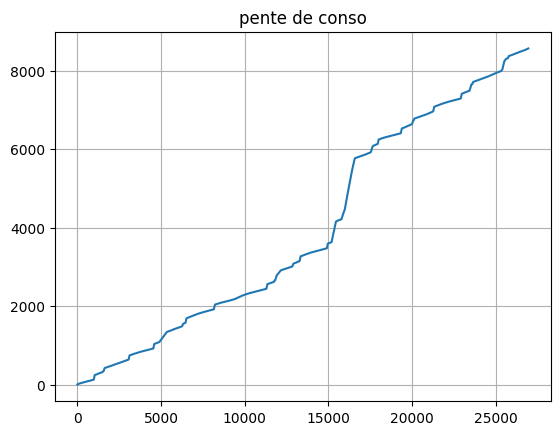

In [233]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.title('pente de conso')
plt.grid()

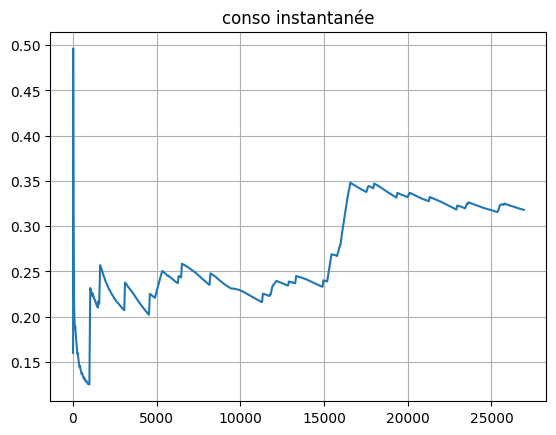

In [234]:
plt.plot(x,ratio)
plt.title('conso instantanée')
plt.grid()

<Axes: >

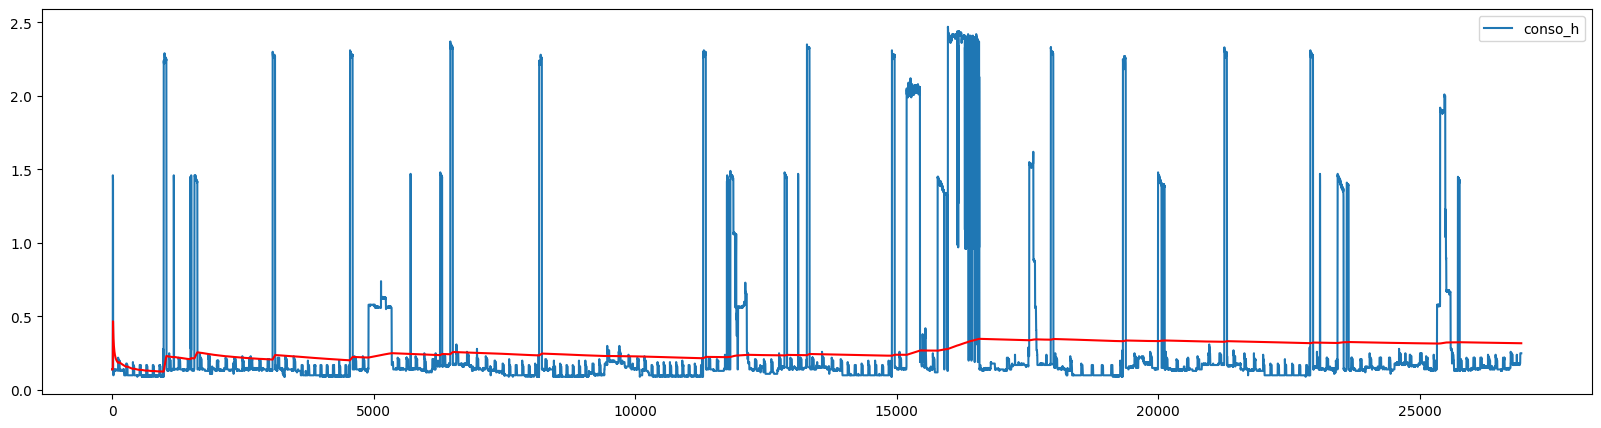

In [235]:
k=1
tail = k*1000
# https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.plot.html
#df['conso_h'].tail(tail).plot.bar(figsize=(20,5),legend=True)
#df['conso_h'].plot.bar(figsize=(20,5),legend=True)
df['conso_h'].plot(figsize=(20,5),legend=True)

# https://stackoverflow.com/questions/47104862/pandas-dataframe-plot-colors-by-column-name
df['cumul_avg'].plot(color='#FF0000')  # red
#plt.axis('off')


<Axes: >

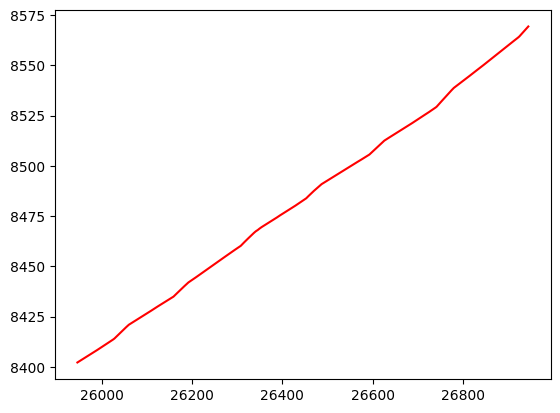

In [236]:
df['cumul'].tail(1000).plot(color='#FF0000')  # red
#plt.axis('off')

In [237]:
df['conso_h'].tail(15)

26931    0.25
26932    0.25
26933    0.25
26934    0.25
26935    0.25
         ... 
26941    0.25
26942    0.25
26943    0.25
26944    0.25
26945    0.25
Name: conso_h, Length: 15, dtype: float64

In [238]:
# 23095 = 2024/03/13 10:30

<Axes: >

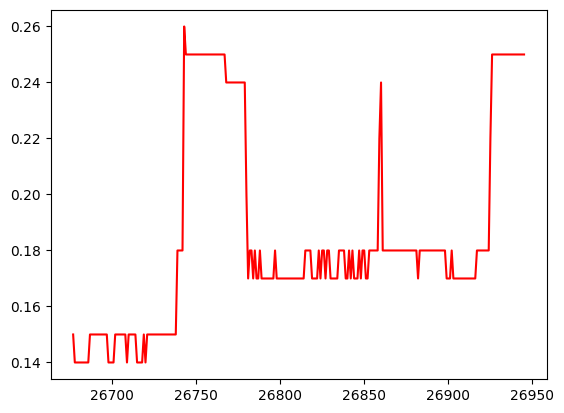

In [239]:
df['conso_h'].tail(l//100).plot(color='#FF0000')  # red
#plt.axis('off')

In [240]:
df.head(),len(df)

(   interval  conso_h  cumul(ms)                      dates  cumul  cumul_avg
 0     26289     0.14      26289 2024-03-14 20:17:32.035591   0.14       0.14
 1     26243     0.14      52532 2024-03-14 20:17:58.278591   0.28       0.14
 2     25885     0.14      78417 2024-03-14 20:18:24.163591   0.42       0.14
 3     25754     0.14     104171 2024-03-14 20:18:49.917591   0.56       0.14
 4     25774     0.14     129945 2024-03-14 20:19:15.691591   0.70       0.14,
 26946)

In [241]:
df.tail(15)

,interval,conso_h,cumul(ms),dates,cumul,cumul_avg
26931,14361,0.25,632385568,2024-03-22 03:56:51.314591,8565.85,0.318055
26932,14213,0.25,632399781,2024-03-22 03:57:05.527591,8566.10,0.318052
26933,14293,0.25,632414074,2024-03-22 03:57:19.820591,8566.35,0.318050
26934,14368,0.25,632428442,2024-03-22 03:57:34.188591,8566.60,0.318047
26935,14443,0.25,632442885,2024-03-22 03:57:48.631591,8566.85,0.318045
...,...,...,...,...,...,...
26941,14458,0.25,632528881,2024-03-22 03:59:14.627591,8568.35,0.318029
26942,14454,0.25,632543335,2024-03-22 03:59:29.081591,8568.60,0.318027
26943,14476,0.25,632557811,2024-03-22 03:59:43.557591,8568.85,0.318024
26944,14534,0.25,632572345,2024-03-22 03:59:58.091591,8569.10,0.318022


In [242]:
import datetime as dt
from datetime import datetime
import pytz
def human_date(timestamp):
   return datetime.fromtimestamp(timestamp, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')

In [243]:
presentDate = datetime.now()
unix_timestamp = datetime.timestamp(presentDate)
unix_timestamp, human_date(unix_timestamp)

(1710444482.838083, '14/03/2024 20:28:02')

In [244]:
df['dates'] = [int(unix_timestamp)-d for d in df.index[::-1]]
df['hdates'] = list(map(human_date,df.dates))
df

,interval,conso_h,cumul(ms),dates,cumul,cumul_avg,hdates
0,26289,0.14,26289,1710417537,0.14,0.140000,14/03/2024 12:58:57
1,26243,0.14,52532,1710417538,0.28,0.140000,14/03/2024 12:58:58
2,25885,0.14,78417,1710417539,0.42,0.140000,14/03/2024 12:58:59
3,25754,0.14,104171,1710417540,0.56,0.140000,14/03/2024 12:59:00
4,25774,0.14,129945,1710417541,0.70,0.140000,14/03/2024 12:59:01
...,...,...,...,...,...,...,...
26941,14458,0.25,632528881,1710444478,8568.35,0.318029,14/03/2024 20:27:58
26942,14454,0.25,632543335,1710444479,8568.60,0.318027,14/03/2024 20:27:59
26943,14476,0.25,632557811,1710444480,8568.85,0.318024,14/03/2024 20:28:00
26944,14534,0.25,632572345,1710444481,8569.10,0.318022,14/03/2024 20:28:01


In [245]:
import numpy as np
ticks = np.arange(len(df)-tail,len(df),50)
x_ticks = df.loc[ticks].dates
h_ticks = df.loc[ticks].hdates


In [246]:
df

,interval,conso_h,cumul(ms),dates,cumul,cumul_avg,hdates
0,26289,0.14,26289,1710417537,0.14,0.140000,14/03/2024 12:58:57
1,26243,0.14,52532,1710417538,0.28,0.140000,14/03/2024 12:58:58
2,25885,0.14,78417,1710417539,0.42,0.140000,14/03/2024 12:58:59
3,25754,0.14,104171,1710417540,0.56,0.140000,14/03/2024 12:59:00
4,25774,0.14,129945,1710417541,0.70,0.140000,14/03/2024 12:59:01
...,...,...,...,...,...,...,...
26941,14458,0.25,632528881,1710444478,8568.35,0.318029,14/03/2024 20:27:58
26942,14454,0.25,632543335,1710444479,8568.60,0.318027,14/03/2024 20:27:59
26943,14476,0.25,632557811,1710444480,8568.85,0.318024,14/03/2024 20:28:00
26944,14534,0.25,632572345,1710444481,8569.10,0.318022,14/03/2024 20:28:01


In [247]:
# fig, ax = plt.subplots()
# plt.plot(ticks,df['conso_h'].tail(tail))

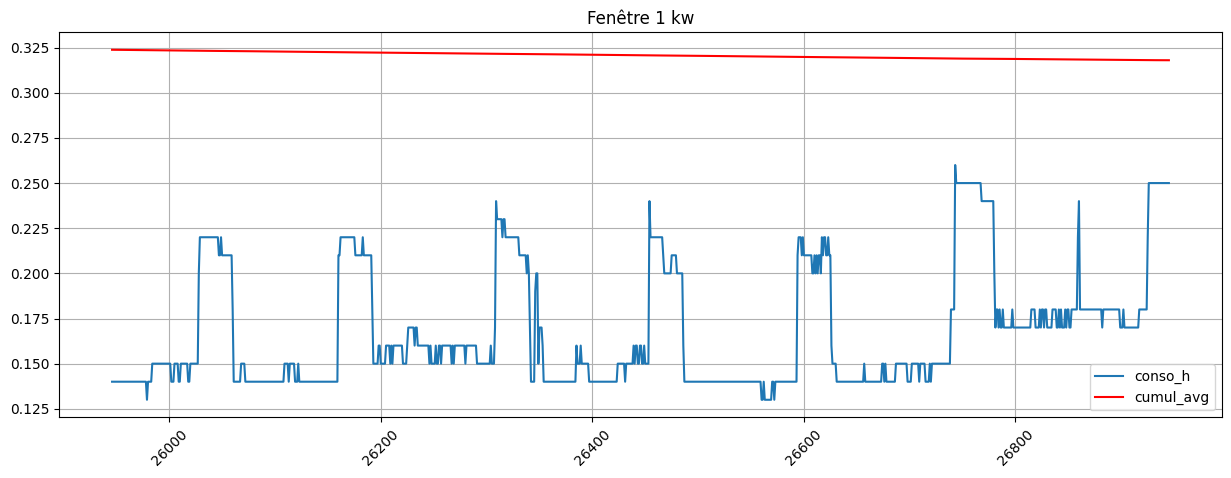

In [248]:
df['conso_h'].tail(tail).plot(figsize=(15,5),legend=True)
df['cumul_avg'].tail(tail).plot(color='red',grid=False, legend=True,rot=45)#,xticks=x_ticks)  # red

plt.title(f'Fenêtre {k} kw')
#plt.xticks(ticks, h_ticks)
plt.grid()

<Axes: ylabel='Frequency'>

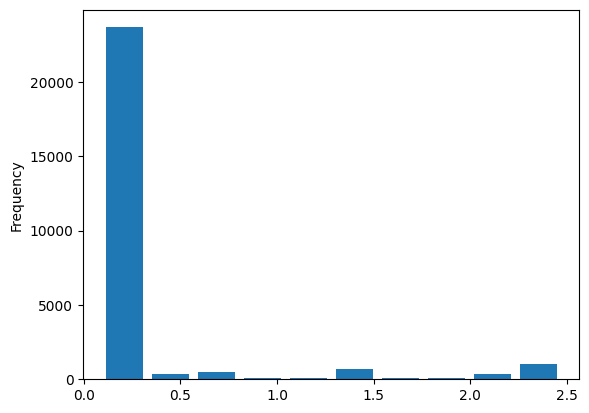

In [249]:
df['conso_h'].plot.hist(rwidth=0.8)